In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/ML

test.xlsx  train_presentation.xlsx


In [ ]:
pip install xlrd

In [ ]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/gdrive/MyDrive/ML/train_presentation.xlsx")

In [ ]:
data.head()

,id,name,brand,categories,imageurls,style,quantities,sizes,5_years_ago,3_years_ago,1 _year_ago,3_months_ago,1_month_ago,corrent_price,data_start,earlier_sold,price next month,relevance
0,1.0,Nike Air Force 1 '07,Nike,Classic,https://sneakerfreak.ru/wp-content/uploads/202...,M&W,no data,no data,9000.0,10000.0,10200.0,10200.0,10400.0,10499.0,2007.0,200.0,10700.0,1.0
1,2.0,Vans Slip-On Classic,Vans,Low,https://sneakerfreak.ru/wp-content/uploads/202...,M&W,no data,no data,5100.0,5100.0,5500.0,5800.0,5800.0,6090.0,2004.0,60.0,6090.0,1.0
2,3.0,adidas Originals Stan Smith,Adidas,Classic,https://sneakerfreak.ru/wp-content/uploads/202...,M&W,no data,no data,10000.0,9500.0,9300.0,9300.0,8999.0,8999.0,2015.0,24.0,8500.0,0.0
3,4.0,Asics Gel-Lyte III,Asics,Running,https://sneakerfreak.ru/wp-content/uploads/202...,M&W,no data,no data,5000.0,5500.0,6000.0,6500.0,6500.0,6500.0,2008.0,78.0,6500.0,0.0
4,5.0,Reebok Club C,Reebok,Classic,https://sneakerfreak.ru/wp-content/uploads/202...,M&W,no data,no data,8000.0,8000.0,8000.0,8300.0,8699.0,8699.0,2013.0,52.0,8699.0,1.0


In [ ]:
data.columns

Index(['id', 'name', 'brand', 'categories', 'imageurls', 'style', 'quantities',
       'sizes', '5_years_ago', '3_years_ago', '1 _year_ago', '3_months_ago',
       '1_month_ago', 'corrent_price', 'data_start', 'earlier_sold',
       'price next month', 'relevance'],
      dtype='object')

In [ ]:
data.dtypes

id                  float64
name                 object
brand                object
categories           object
imageurls            object
style                object
quantities           object
sizes                object
5_years_ago         float64
3_years_ago         float64
1 _year_ago         float64
3_months_ago        float64
1_month_ago         float64
corrent_price       float64
data_start          float64
earlier_sold        float64
price next month    float64
relevance           float64
dtype: object

In [ ]:
data.isnull().sum()

id                  0
name                0
brand               0
categories          0
imageurls           0
style               0
quantities          0
sizes               0
5_years_ago         0
3_years_ago         0
1 _year_ago         0
3_months_ago        0
1_month_ago         0
corrent_price       0
data_start          0
earlier_sold        0
price next month    0
relevance           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree

%matplotlib inline
from graphviz import Source
from IPython.display import HTML, SVG, display

In [ ]:
X = data.loc[:, "5_years_ago":"earlier_sold"]  # На чём обучаем
y = data.relevance  # Целевой столбец

In [ ]:
for x in data["relevance"]:
    x = str(x)
    x = int(x[0])

In [ ]:
for x in data["earlier sold"]:
    x = str(x)
    x = int(x[0])

In [ ]:
# Создаём классификатор
clf = tree.DecisionTreeClassifier()

# Обучаем
clf = clf.fit(X, y)

# Предсказываем
# y_pred = clf.predict(X)

[Text(0.5, 0.9285714285714286, 'X[6] <= 2013.5\ngini = 0.269\nsamples = 100\nvalue = [84, 16]'),
 Text(0.3333333333333333, 0.7857142857142857, 'X[2] <= 28990.0\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.25, 0.6428571428571429, 'X[3] <= 7750.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.16666666666666666, 0.5, 'X[1] <= 5300.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.4166666666666667, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7857142857142857, 'X[6] <= 2018.5\ngini = 0.128\nsamples = 87\nvalue = [81, 6]'),
 Text(0.5833333333333334, 0.6428571428571429, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.75, 0.6428571428571429, 'X[1] <= 4694.5\ngini = 0.49\nsample

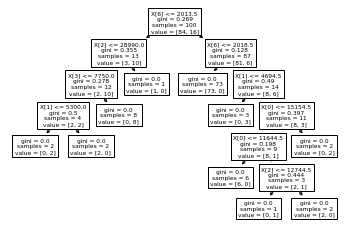

In [ ]:
tree.plot_tree(clf)

In [ ]:
print("Accuracy on training set: {:.3f}".format(clf.score(X, y)))

Accuracy on training set: 1.000


Score


1.0

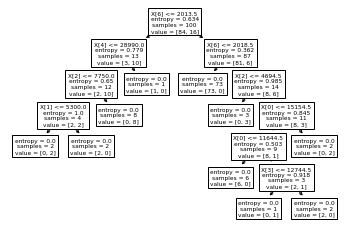

In [ ]:
X = data.loc[:, "5_years_ago":"earlier_sold"]

clf = tree.DecisionTreeClassifier(criterion="entropy")
y = data.relevance
clf.fit(X, y)
tree.plot_tree(clf)
print("Score")
clf.score(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data1 = pd.read_excel("/content/gdrive/MyDrive/ML/test.xlsx")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on test set: 0.933


In [ ]:
print("Accuracy on test set: {:.3f}".format(0.867))

Accuracy on test set: 0.867
